Extracted files from /content/drive/MyDrive/0-20241217T041257Z-001.zip to /content/drive/MyDrive/MajorProject/class_0
Extracted files from /content/drive/MyDrive/1-20241217T041312Z-001.zip to /content/drive/MyDrive/MajorProject/class_1
Contents of class_0 directory: ['0']
Contents of class_1 directory: ['1']
Loading images from: /content/drive/MyDrive/MajorProject/class_0
Processing: /content/drive/MyDrive/MajorProject/class_0/0/c03-087d-s00-03.png
Processing: /content/drive/MyDrive/MajorProject/class_0/0/c06-011-s00-04.png
Processing: /content/drive/MyDrive/MajorProject/class_0/0/a02-037-s02-02.png
Processing: /content/drive/MyDrive/MajorProject/class_0/0/c06-011-s01-01.png
Processing: /content/drive/MyDrive/MajorProject/class_0/0/a01-003u-s01-03.png
Processing: /content/drive/MyDrive/MajorProject/class_0/0/c03-081d-s01-02.png
Processing: /content/drive/MyDrive/MajorProject/class_0/0/c03-094d-s00-06.png
Processing: /content/drive/MyDrive/MajorProject/class_0/0/a01-000u-s01-01.png
Proc

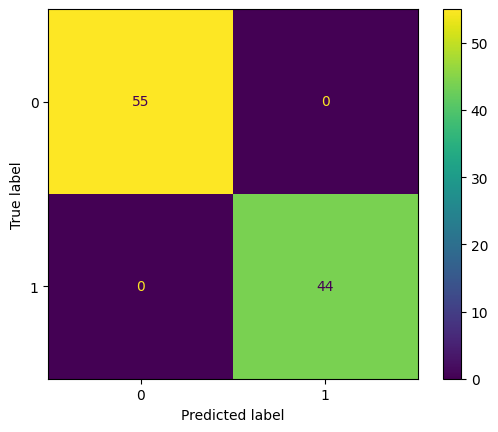

AdaBoost Training Accuracy: 100.00%
AdaBoost Classifier Results:
Accuracy: 100.00%


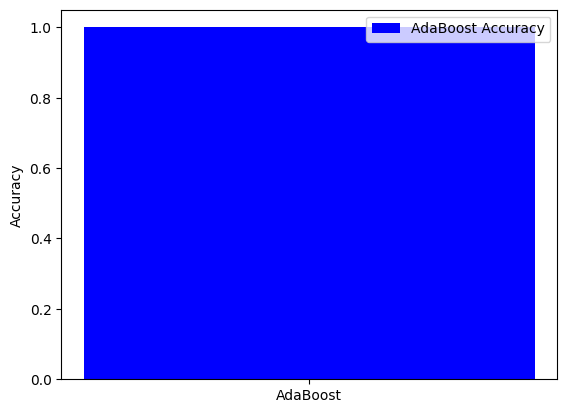

In [2]:
import cv2
import numpy as np
import os
import zipfile
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# Function to extract zip files
def extract_zip(zip_path, extract_to):
    """Extracts a zip file to the specified directory."""
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted files from {zip_path} to {extract_to}")

# Define paths to the image zip files
class_0_zip = '/content/drive/MyDrive/0-20241217T041257Z-001.zip'  # Path to class 0 zip file
class_1_zip = '/content/drive/MyDrive/1-20241217T041312Z-001.zip'  # Path to class 1 zip file

# Define the directory to extract the files into
extract_to_class_0 = '/content/drive/MyDrive/MajorProject/class_0'
extract_to_class_1 = '/content/drive/MyDrive/MajorProject/class_1'

# Extract zip files
extract_zip(class_0_zip, extract_to_class_0)
extract_zip(class_1_zip, extract_to_class_1)

# Initialize lists for features and labels
S_Data = []
S_label = []

# Feature extraction function
def Feature_extraction(img_path):
    """Extract simple image features like mean, standard deviation, and edge count."""
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read image {img_path}")  # Debugging message
        return None  # Return None if image fails to load

    # Extract mean, standard deviation, and edge count as features
    mean = np.mean(img)
    std = np.std(img)
    edges = cv2.Canny(img, 100, 200)
    edge_count = np.sum(edges > 0)
    return [mean, std, edge_count]

# Function to load images and labels from a directory (handling subdirectories)
def load_images_from_directory(directory, label):
    """Loads images from a directory and extracts features."""
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist")  # Debugging message
        return

    print(f"Loading images from: {directory}")
    # Loop through subdirectories (class 0 and class 1)
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, filename)
                if os.path.isfile(img_path):
                    # Check file extension to ensure it's an image
                    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                        print(f"Processing: {img_path}")  # Debugging message
                        features = Feature_extraction(img_path)
                        if features is not None:
                            S_Data.append(features)
                            S_label.append(label)
                        else:
                            print(f"Skipping {img_path} due to extraction failure")  # Debugging message
                    else:
                        print(f"Skipping non-image file: {filename}")  # Debugging message

# Check if directories have files
print(f"Contents of class_0 directory: {os.listdir(extract_to_class_0)}")
print(f"Contents of class_1 directory: {os.listdir(extract_to_class_1)}")

# Load images from both class 0 and class 1 directories
load_images_from_directory(extract_to_class_0, 0)
load_images_from_directory(extract_to_class_1, 1)

# Check if the data is loaded properly
print(f"Number of samples: {len(S_Data)}")
print(f"Number of features per sample: {len(S_Data[0]) if S_Data else 0}")

# Convert data and labels to numpy arrays
S_Data = np.array(S_Data)
S_label = np.array(S_label)

# Check the shape of the data
print(f"S_Data shape: {S_Data.shape}")

# Ensure data is not empty
if S_Data.shape[0] == 0:
    print("Error: No data loaded. Please check the image loading and feature extraction process.")
else:
    print("Data loaded successfully. Proceeding with model training.")

    # Train AdaBoost Classifier (using default DecisionTree as base estimator)
    ada_boost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
    ada_boost_model.fit(S_Data, S_label)

    # Make predictions on the training data
    ypred_AdaBoost = ada_boost_model.predict(S_Data)

    # Plot confusion matrix for AdaBoost
    ConfusionMatrixDisplay.from_estimator(ada_boost_model, X=S_Data, y=S_label)
    plt.show()

    # Accuracy
    AdaBoost_ACC = accuracy_score(S_label, ypred_AdaBoost)
    print(f"AdaBoost Training Accuracy: {AdaBoost_ACC * 100:.2f}%")

    # Save the trained model
    joblib.dump(ada_boost_model, "/content/drive/MyDrive/Trained_AdaBoost_Model.pkl")

    # Evaluate the model
    print("AdaBoost Classifier Results:")
    print(f"Accuracy: {AdaBoost_ACC * 100:.2f}%")

    # Plot the results (optional)
    plt.figure()
    plt.bar(['AdaBoost'], [AdaBoost_ACC], label="AdaBoost Accuracy", color='b')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.show()

Model loaded successfully!


Saving dysgraphia6.jpg to dysgraphia6.jpg


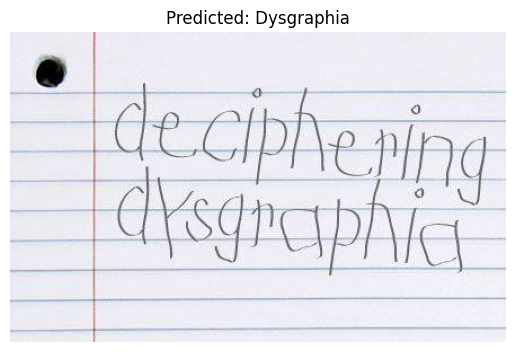

In [5]:
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt

# --- Feature Extraction Function (same as before) ---
def Feature_extraction(img_path):
    """Extract simple image features like mean, std deviation, and edge count."""
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read image {img_path}")
        return None
    mean = np.mean(img)
    std = np.std(img)
    edges = cv2.Canny(img, 100, 200)
    edge_count = np.sum(edges > 0)
    return [mean, std, edge_count]

# --- Load Trained AdaBoost Model ---
model_path = "/content/drive/MyDrive/Trained_AdaBoost_Model.pkl"
model = joblib.load(model_path)
print("Model loaded successfully!")

# --- Test Image (upload or specify path) ---
# Option 1: Upload from local system
from google.colab import files
uploaded = files.upload()

# Get the uploaded filename
img_path = list(uploaded.keys())[0]

# Option 2 (alternative): Use a specific file path on Drive or Colab
# img_path = '/content/drive/MyDrive/your_test_image.jpg'

# --- Extract features from test image ---
features = Feature_extraction(img_path)
if features is not None:
    X_test = np.array([features])

    # --- Make prediction ---
    prediction = model.predict(X_test)[0]

    # --- Show image and prediction ---
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Predicted: " + ("Dysgraphia" if prediction == 1 else "Normal"))
    plt.show()
else:
    print("Failed to extract features from image.")